In [1]:
import pandas as pd

In [2]:
#!pip install nsepy

In [3]:
#pip install scikit-learn==1.0.0

In [4]:
#pip install statsmodels==0.12.2

In [5]:
from nsepy import get_history as gh
import datetime as dt

In [6]:
#!pip install yfinance

In [7]:
import yfinance as yf

In [8]:
import datetime as dt

start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'AXISBANK.NS'  # Stock symbol in uppercase

stk_data = yf.download(symbol, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [9]:
stk_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012,744.555725,5695690
2021-07-02,747.599976,752.849976,744.000000,750.650024,748.745117,3557647
2021-07-05,757.099976,762.000000,753.400024,760.349976,758.420410,4680089
2021-07-06,757.000000,767.000000,755.200012,758.349976,756.425476,5529485
2021-07-07,755.900024,764.000000,752.250000,762.900024,760.963989,3573368
...,...,...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976,727.748474,7746270
2022-01-20,731.049988,737.150024,722.150024,728.900024,727.050232,8505400
2022-01-21,722.000000,725.250000,708.049988,712.500000,710.691895,10689060


In [10]:
#start = dt.datetime(2021,7,1)
#end = dt.datetime(2022,1,27)
#stk_data = gh(symbol='NIFTY',start=start,end=end)

In [11]:
stk_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012,744.555725,5695690
2021-07-02,747.599976,752.849976,744.000000,750.650024,748.745117,3557647
2021-07-05,757.099976,762.000000,753.400024,760.349976,758.420410,4680089
2021-07-06,757.000000,767.000000,755.200012,758.349976,756.425476,5529485
2021-07-07,755.900024,764.000000,752.250000,762.900024,760.963989,3573368
...,...,...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976,727.748474,7746270
2022-01-20,731.049988,737.150024,722.150024,728.900024,727.050232,8505400
2022-01-21,722.000000,725.250000,708.049988,712.500000,710.691895,10689060


In [12]:
stk_data=stk_data[["Open","High","Low","Close"]]


In [13]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012
2021-07-02,747.599976,752.849976,744.000000,750.650024
2021-07-05,757.099976,762.000000,753.400024,760.349976
2021-07-06,757.000000,767.000000,755.200012,758.349976
2021-07-07,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976
2022-01-20,731.049988,737.150024,722.150024,728.900024
2022-01-21,722.000000,725.250000,708.049988,712.500000


In [14]:
column="High"

In [15]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (143, 1)


In [16]:
len(data1)

143

In [17]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

114
X_train length: (114, 1)
X_test length: (29, 1)
y_train length: (114, 1)
y_test length: (29, 1)


In [18]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
lags=[1,2,3,4]
from statsmodels.tsa.ar_model import AutoReg
for i in lags:
    #print(i)

    for td in trends:

        #print(td)
        #trendslist.append(td)
        model = AutoReg(X_train, lags=i,trend=td)
        model_fit = model.fit()
        # make prediction
        y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
        #mse=mean_squared_error(y_test,y_pred,squared=False)
        from stockFunctions import rmsemape
        print("Lag={},Trend={}".format(i,td))
        rmsemape(y_test,y_pred)
print("************")   

Lag=1,Trend=n
RMSE-Testset: 0.14705297199802278
maPe-Testset: 1.1760703356246518
Lag=1,Trend=t
RMSE-Testset: 0.15275923011481332
maPe-Testset: 1.1677590631629378
Lag=1,Trend=c
RMSE-Testset: 0.15046011632975206
maPe-Testset: 1.3928677851125684
Lag=1,Trend=ct
RMSE-Testset: 0.16594710185931777
maPe-Testset: 1.16551864873268
Lag=2,Trend=n
RMSE-Testset: 0.15057440266017907
maPe-Testset: 1.1941368792530622
Lag=2,Trend=t
RMSE-Testset: 0.1400014770948514
maPe-Testset: 1.2265407312655017
Lag=2,Trend=c
RMSE-Testset: 0.1725044120187071
maPe-Testset: 1.5813219321671237
Lag=2,Trend=ct
RMSE-Testset: 0.15655095485573495
maPe-Testset: 1.2189130449244343
Lag=3,Trend=n
RMSE-Testset: 0.15416360120897496
maPe-Testset: 1.2056831901548526
Lag=3,Trend=t
RMSE-Testset: 0.1434621251832749
maPe-Testset: 1.322463960283664
Lag=3,Trend=c
RMSE-Testset: 0.1847918133438033
maPe-Testset: 1.6856773562973246
Lag=3,Trend=ct
RMSE-Testset: 0.15143960705364454
maPe-Testset: 1.2816443100764312
Lag=4,Trend=n
RMSE-Testset: 0.14

C:\Users\lavanya\anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
C:\Users\lavanya\anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
C:\Users\lavanya\anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
C:\Users\lavanya\anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use t

In [19]:
len(y_pred)

29

In [20]:
i=1
td='ct'
model = AutoReg(X_train, lags=i,trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Lag={},Trend={}".format(i,td))
rmsemape(y_test,y_pred)
print("************")

Lag=1,Trend=ct
RMSE-Testset: 0.16594710185931777
maPe-Testset: 1.16551864873268
************


C:\Users\lavanya\anaconda3\envs\aiml\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


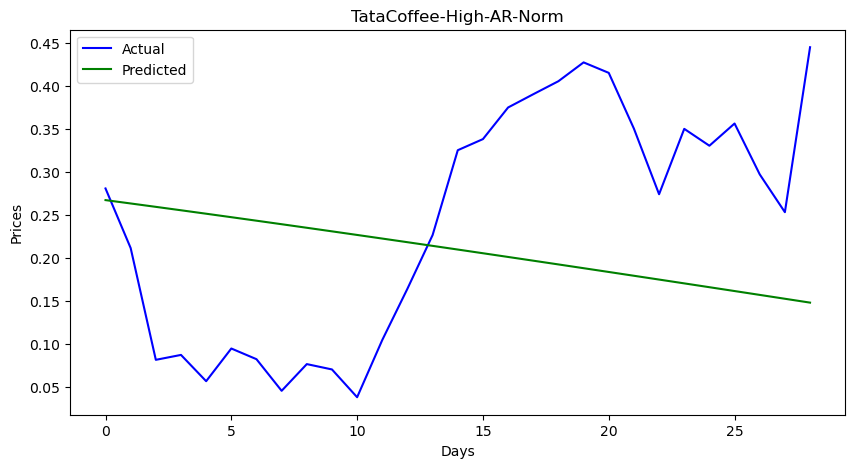

In [21]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-High-AR-Norm","Days","Prices")

In [22]:
len(data1)

143

In [23]:
y_test

array([[0.2804666 ],
       [0.21121859],
       [0.08140959],
       [0.08711833],
       [0.05658954],
       [0.09456434],
       [0.08215432],
       [0.04542052],
       [0.07644558],
       [0.07024057],
       [0.0379745 ],
       [0.10449236],
       [0.16406049],
       [0.22635876],
       [0.32489456],
       [0.33780086],
       [0.37453466],
       [0.38992297],
       [0.40506315],
       [0.42690491],
       [0.41474303],
       [0.34996275],
       [0.273765  ],
       [0.34971461],
       [0.33010671],
       [0.35591962],
       [0.29684777],
       [0.2529164 ],
       [0.44452709]])

In [24]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])

In [25]:
aTestNormTable

,High
0,0.280467
1,0.211219
2,0.08141
3,0.087118
4,0.05659
5,0.094564
6,0.082154
7,0.045421
8,0.076446
9,0.070241


In [26]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)

In [27]:
actual_stock_price_test_ori

array([[721.95001221],
       [708.        ],
       [681.84997559],
       [683.        ],
       [676.84997559],
       [684.5       ],
       [682.        ],
       [674.59997559],
       [680.84997559],
       [679.59997559],
       [673.09997559],
       [686.5       ],
       [698.5       ],
       [711.04998779],
       [730.90002441],
       [733.5       ],
       [740.90002441],
       [744.        ],
       [747.04998779],
       [751.45001221],
       [749.        ],
       [735.95001221],
       [720.59997559],
       [735.90002441],
       [731.95001221],
       [737.15002441],
       [725.25      ],
       [716.40002441],
       [755.        ]])

In [28]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [29]:
actual_stock_price_test_oriA

,High
0,721.950012
1,708.0
2,681.849976
3,683.0
4,676.849976
5,684.5
6,682.0
7,674.599976
8,680.849976
9,679.599976


In [30]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [31]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

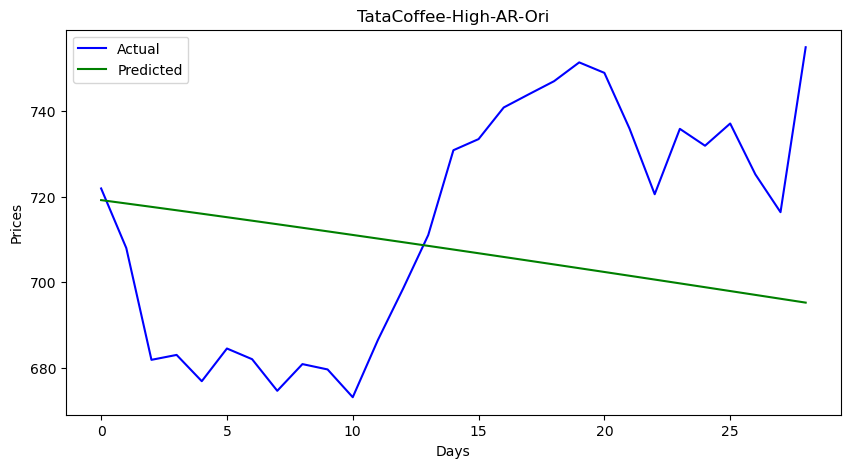

In [32]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-High-AR-Ori","Days","Prices")

In [33]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 33.430045695281024
maPe-Testset: 0.04320721595254457


In [34]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [35]:
forecast

array([0.14334824, 0.13883008, 0.13430168, 0.12976349])

In [36]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Highfore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Highfore"])

In [37]:
forecast_stock_price_test_oriF

,Highfore
0,694.327516
1,693.417334
2,692.505088
3,691.590868


In [38]:
forecast_stock_price_test_oriF.to_csv("HighAR.csv",index=False)

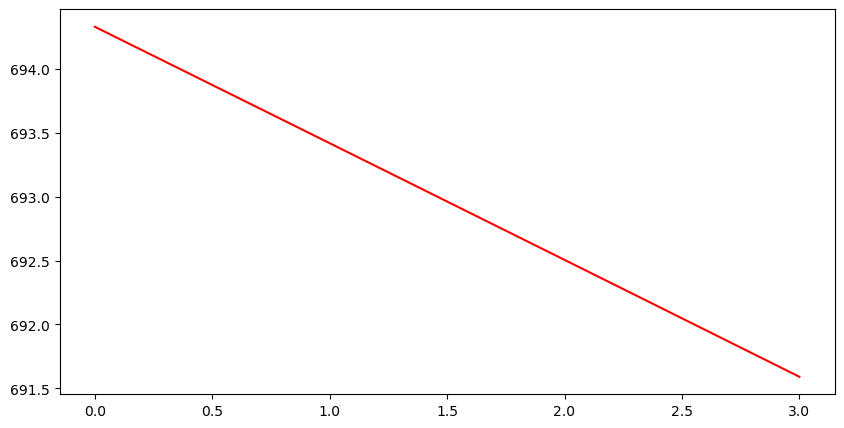

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[116:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")